# About Dataset

### This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

## Columns:

- **Age**: This column represents the age of each employee in years. The values in this column are numeric.

- **Gender**: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

- **Education Level**: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

- **Job Title**: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

- **Years of Experience**: This column represents the number of years of work experience of each employee. The values in this column are numeric.

- **Salary**: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [437]:
# library we will use
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [438]:
# 1st, after importing the libraries, we will read the data
df = pd.read_csv('../DataSets/Salary Data.csv')

In [439]:
# 2nd, we will see some information about the data
df.info()
# so we have 6 columns, and 375 rows
# from the first look it's seems that we have two null values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [440]:
# before we deal with the null values, let's assign the features and the target
# our features are all the columns except the salary column
X = df.drop(columns='Salary')
# our prediction target is the salary
y = df[['Salary']]

In [441]:
# 3rd, EDA (Exploratory Data Analysis) 
# we will start by checking the null values
print(X.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
dtype: int64


In [442]:
df.dropna(inplace=True)

In [443]:
# our null values are relly a few so we can just drop them
X = X.dropna(subset=['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience'])

<Axes: >

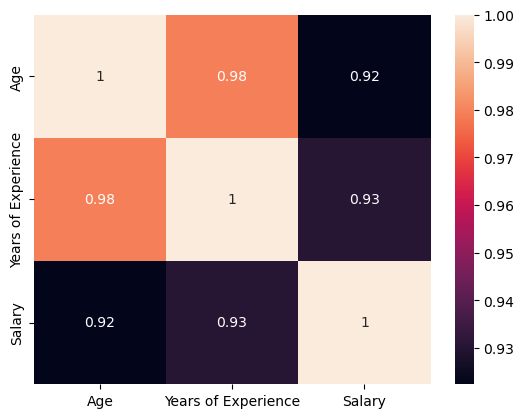

In [444]:
# 4th, we will check the correlation between the features and the target
# we will use the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [445]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
dtypes: float64(2), object(3)
memory usage: 17.5+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>]], dtype=object)

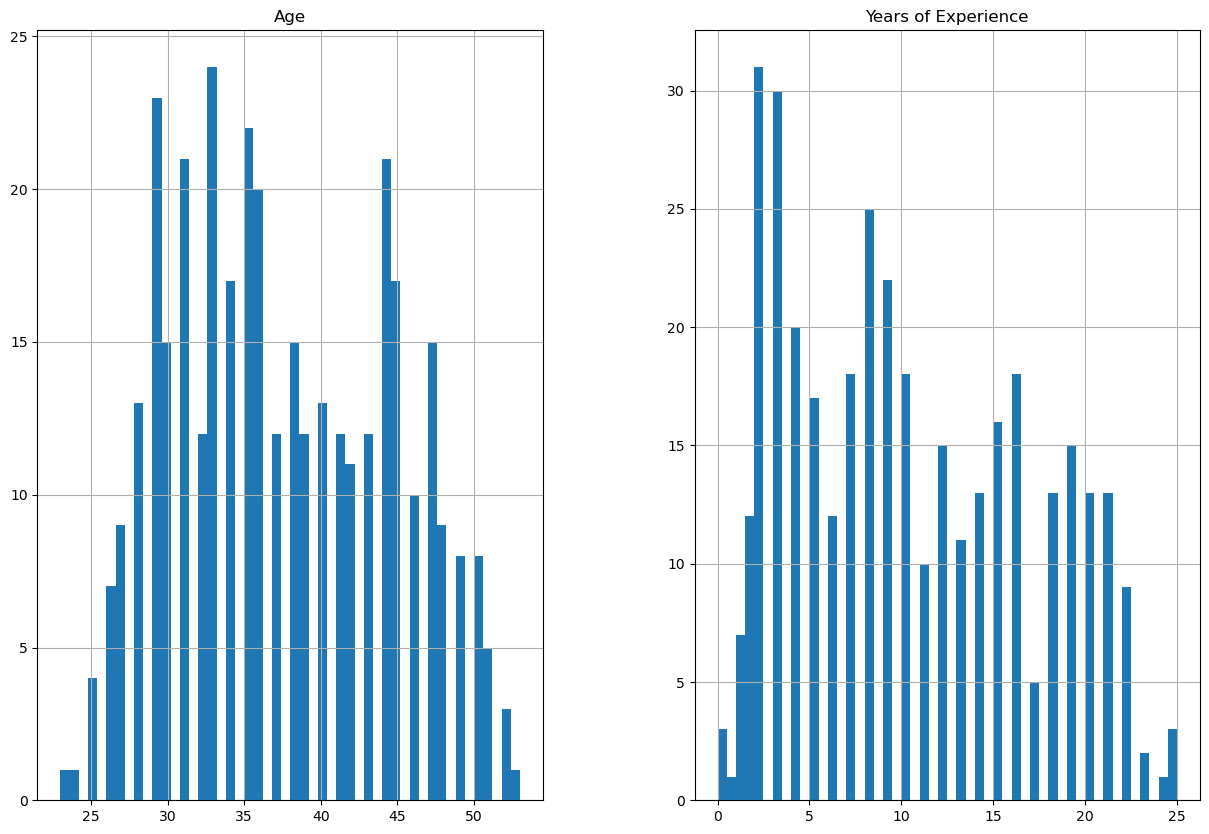

In [446]:
X.hist(bins=50, figsize=(15,10))


<Axes: >

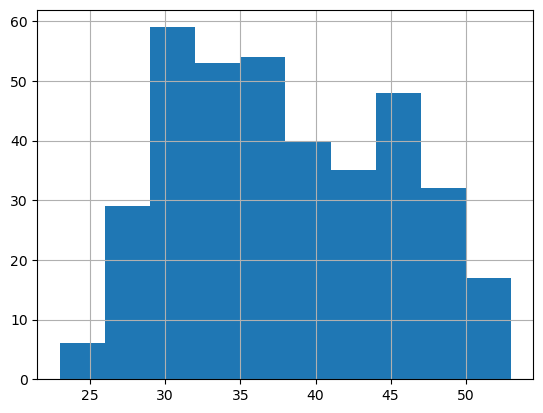

In [447]:
# Age column
X["Age"].hist()

In [448]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
dtypes: float64(2), object(3)
memory usage: 17.5+ KB


<Axes: xlabel='Gender', ylabel='count'>

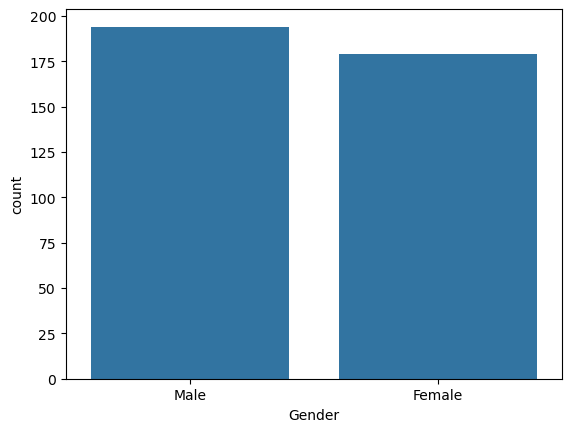

In [449]:
# Gender column
# we will use the countplot
sns.countplot(data=X, x="Gender")

In [457]:
# Job Title column
# I think that we can do some feature engineeringn in this column
# here what we are going to do:
# 1- create a new column position and encode the job title
# we will loop over the keywords and check if the keyword in the job title
# if it's true we will add the keyword to the new column

X[].value_counts()


Age   Gender  Education Level  Job Title                           Years of Experience  position
35.0  Female  Bachelor's       Senior Marketing Analyst            8.0                              6
33.0  Male    Bachelor's       Junior Business Analyst             4.0                              4
38.0  Female  Bachelor's       Senior Business Analyst             10.0                             3
34.0  Male    Bachelor's       Senior Operations Coordinator       7.0                              3
29.0  Female  Bachelor's       Junior Project Manager              2.0                              3
                                                                                                   ..
33.0  Male    Master's         Product Designer                    6.0                              1
                               Business Intelligence Analyst       7.0                              1
              Bachelor's       Web Developer                       6.0                 

In [478]:
X['position'] = X['Job Title'].apply(lambda title: next((pos for pos in positions if pos in title), 'Other'))
X["position"].value_counts()

position
S        203
u         94
o         33
p         21
r         18
t          3
Other      1
Name: count, dtype: int64

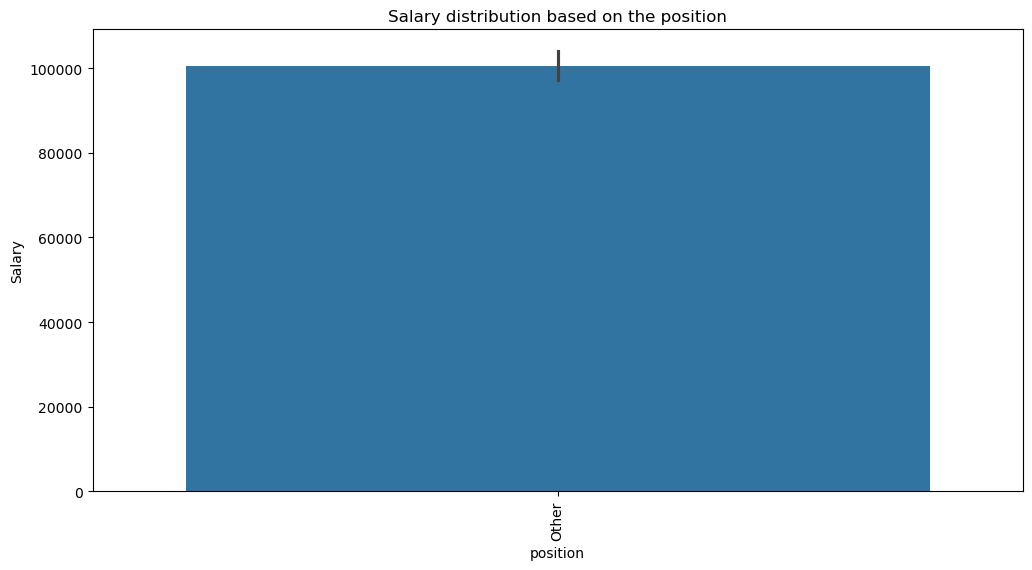

In [ ]:
# let's visualize the salary distribution based on the position
df_conected = pd.concat([X, df])
plt.figure(figsize=(12, 6))
sns.barplot(x='position', y='Salary', data=df_conected)
plt.xticks(rotation=90)
plt.title('Salary distribution based on the position')
plt.show()


In [ ]:
# now we will encode the job title column
positions = ["CEO", "Chief", 'Director',  'Senior' , "Researcher", "HR", 'Manager', 'Junior',"Analyst",  "Accountant", "Other" ,"Recruiter", "Support"]
ordinal_encoder = OrdinalEncoder(categories=[positions])
X['position_encoded'] = ordinal_encoder.fit_transform(X[['position']])

<Axes: xlabel='Education Level'>

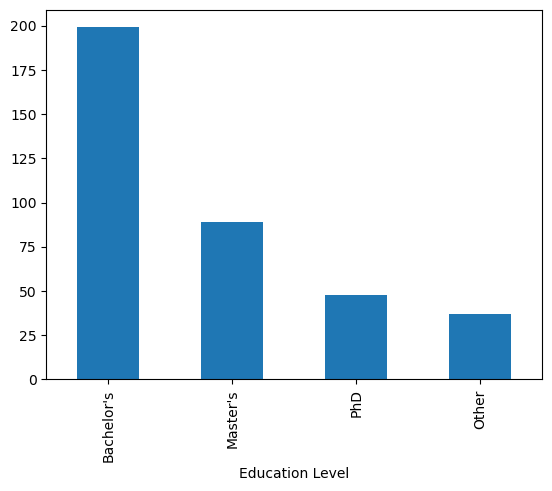

In [ ]:
X["Education Level"].value_counts().plot(kind='bar')

In [ ]:
edu_dic= {'phD':'PhD', 'High School':'High School', "Bachelor's Degree":"Bachelor's", 
           "Master's Degree":"Master's", "Master's":"Master's", "Bachelor's":"Bachelor's", "PhD":"PhD"}

<Axes: >

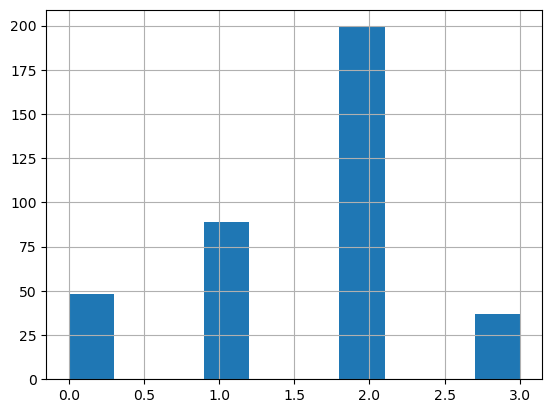

In [ ]:
# let's encode the education level
ord_encoder = OrdinalEncoder(categories=[["PhD", "Master's", "Bachelor's", "Other"]])
X['Education_Level_encoded'] = ord_encoder.fit_transform(X[['Education Level']])
X['Education_Level_encoded'].hist()

<Axes: >

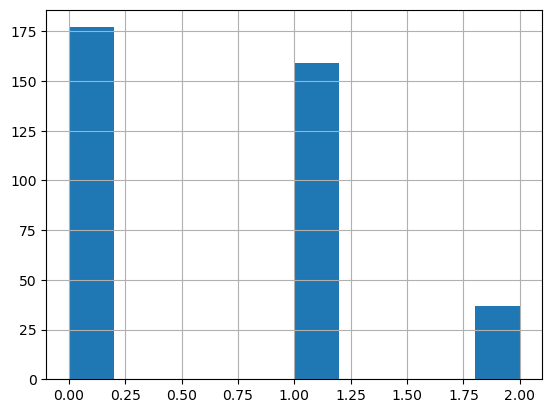

In [ ]:
# encoding the Gender column
ord_encoder = OrdinalEncoder(categories = [["Male", "Female", "Other"]])
X["Gender_encoded"] = ord_encoder.fit_transform(X[["Gender"]])
X["Gender_encoded"].hist()

In [ ]:
# let's drop the columns that we don't need
X = X.drop(columns=['Job Title', 'Education Level', 'position', 'Gender'])


In [ ]:
# let's drop 2 random rows from y so they match the X
y = y.drop([0, 1])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      373 non-null    object 
 1   Years of Experience      373 non-null    object 
 2   position_encoded         373 non-null    float64
 3   Education_Level_encoded  373 non-null    float64
 4   Gender_encoded           373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 17.5+ KB


In [ ]:
# convert the Year of Experience to int
# and fill other with 0
X["Years of Experience"] = X["Years of Experience"].apply(lambda x: 0 if x == "Other" else x)
X["Years of Experience"] = X["Years of Experience"].astype(int)
X["Age"] = X["Age"].apply(lambda x: 0 if x == "Other" else x)

In [ ]:
X.sample(5)

,Age,Years of Experience,position_encoded,Education_Level_encoded,Gender_encoded
97,26.0,1,10.0,2.0,0.0
151,36.0,11,10.0,1.0,0.0
66,46.0,19,10.0,2.0,0.0
88,46.0,21,10.0,1.0,0.0
39,0.0,0,10.0,3.0,2.0


In [ ]:
# 5th, split the data
# we will split the data into training and testing data
# we will use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train.fillna(0).replace([np.inf, -np.inf], 0).astype(int)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 2 to 374
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  371 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [ ]:
# 6th, we will build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# predict the test data
predictions = model.predict(X_test)
predictions

array([[112963.40923726],
       [ 95429.71356063],
       [102178.5270818 ],
       [ 95384.0193389 ],
       [120502.99045659],
       [109736.36823713],
       [ 93214.84982685],
       [111083.61790022],
       [ 97490.87017406],
       [ 96465.78631761],
       [104803.39189527],
       [ 95429.71356063],
       [101303.65635094],
       [100697.74792392],
       [ 99370.6615111 ],
       [ 97490.87017406],
       [ 95429.71356063],
       [ 95667.76195928],
       [ 99976.56993812],
       [108275.75232952],
       [115892.17992137],
       [107592.99752997],
       [117012.37008634],
       [ 87084.8369475 ],
       [ 95384.0193389 ],
       [ 88810.93553949],
       [118776.8918646 ],
       [ 99216.96876605],
       [ 98951.48608167],
       [115372.26262879],
       [ 95429.71356063],
       [ 99312.07507457],
       [ 95429.71356063],
       [105524.56988108],
       [ 88887.78191202],
       [ 90498.61094522],
       [121945.3464282 ],
       [ 97130.28118116],
       [1107

In [ ]:
y_test

,Salary
329,180000.0
35,45000.0
17,115000.0
316,80000.0
59,105000.0
...,...
96,160000.0
197,155000.0
313,60000.0
294,140000.0


/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_2018/468288966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions-y_test)


<Axes: ylabel='Density'>

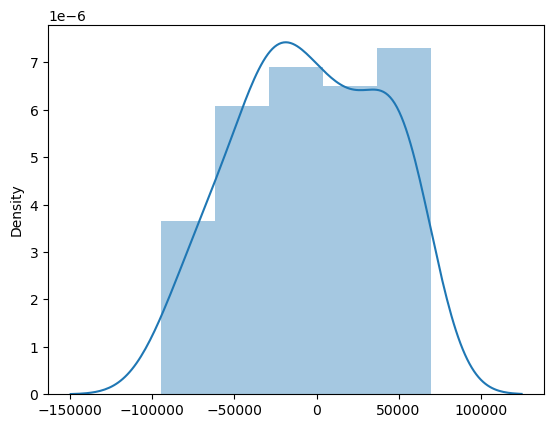

In [ ]:
import seaborn as sns
sns.distplot(predictions-y_test)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# let's check the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.17333333333333334


In [ ]:
# Accuracy: 0.14666666666666667
#  